RGB
(768, 1024, 3)


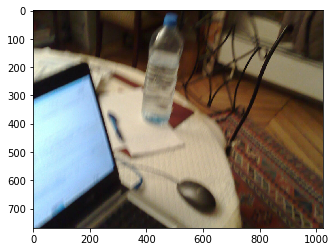

In [49]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import scipy.ndimage.filters

from matplotlib import pyplot as plt
from matplotlib import colors
from skimage.color import rgb2lab, lab2rgb

im = Image.open('sample_data/1024x768/5076506.jpg')
print(im.mode)
imArr = np.array(im)

print (m.shape)
h = m.shape[0]
w = m.shape[1]


plt.imshow(imArr, cmap='gray', vmin=0, vmax=255)

In [43]:

fft = np.fft.fft2(m[:,:,0])

In [51]:
flattenFFT = fft.flatten()
m = max(flattenFFT)
m
alpha = 5
ftr = [(a > alpha) for a in flattenFFT]
C = flattenFFT[ftr]
feat = len(C)/len(flattenFFT)



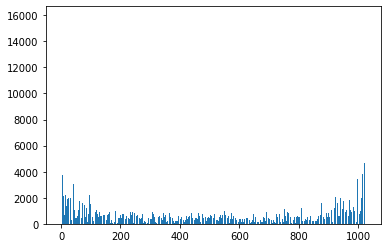

In [59]:
plt.bar( np.arange(len(fft[410])),np.absolute(fft[410]))
plt.show()

In [53]:
a = np.power(np.absolute(flattenFFT),1/4)

a = a/a.sum()
a= a* 255/max(a)

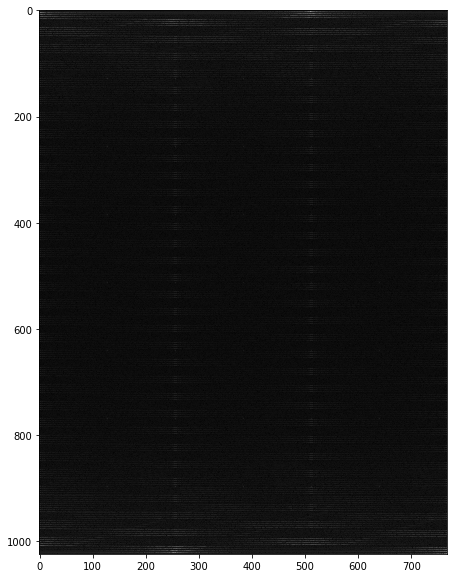

In [54]:
a2 = a.astype(np.uint8)
a2 = a2.reshape(w,h)

plt.figure(figsize=(10,10))
plt.imshow( a2,cmap='gray', vmin=0, vmax=255)

In [50]:
print ("BLUR FEATURE = ", feat)


BLUR FEATURE =  0.1226183573404948
